In [29]:
%matplotlib inline
import numpy as np
import tqdm as tqdm
import matplotlib.pyplot as plt

In [65]:
h1 = []
h1 += [np.genfromtxt('tests/hid1/hid1_1.csv', delimiter=',')]
h1 += [np.genfromtxt('tests/hid1/hid1_2.csv', delimiter=',')]
h1 += [np.genfromtxt('tests/hid1/hid1_4.csv', delimiter=',')]
h1 += [np.genfromtxt('tests/hid1/hid1_16.csv', delimiter=',')]
h1 += [np.genfromtxt('tests/hid1/hid1_32.csv', delimiter=',')]

for i, arr in enumerate(h1):
    # strip last value
    h1[i] = arr[:-1].reshape((-1,3))

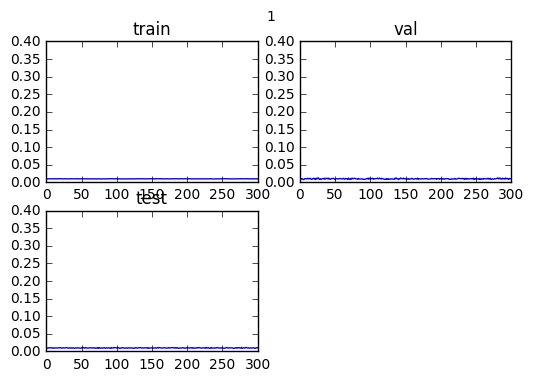

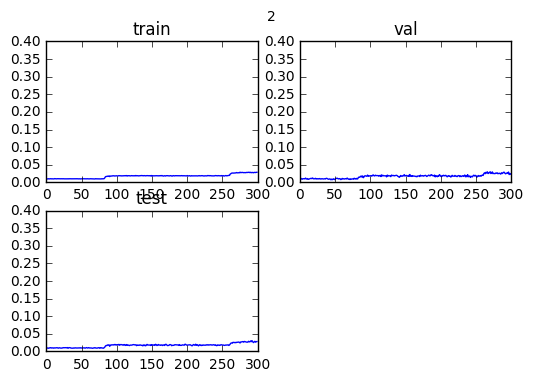

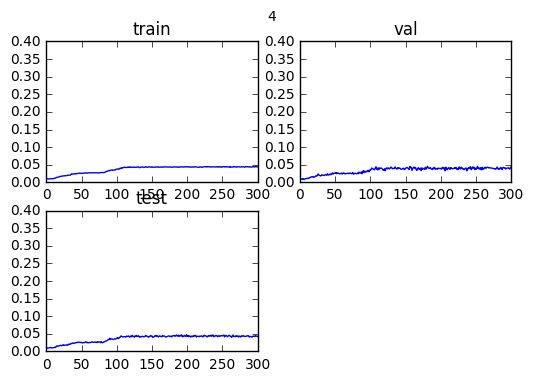

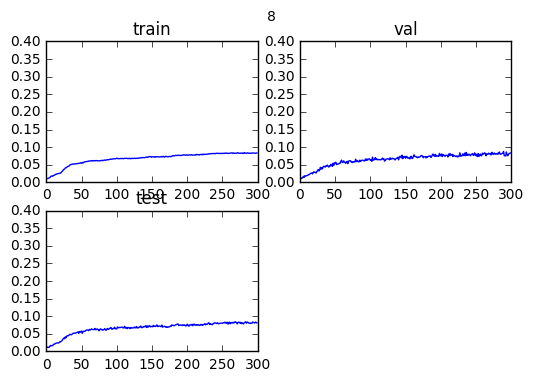

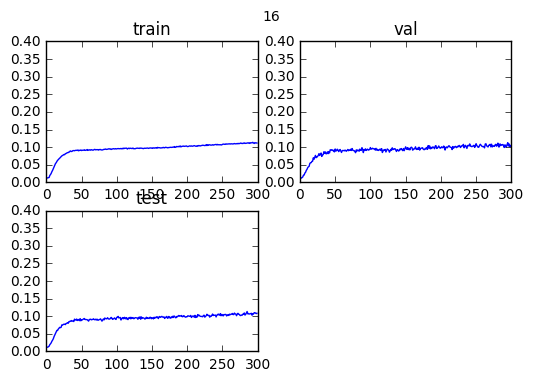

In [67]:
for i, arr in enumerate(h1):
    titles = ['train', 'val', 'test']
    plt.figure()
    for j in range(3):
        plt.subplot(2,2,j+1)
        plt.plot((h1[i])[:,j])
        plt.title(titles[j])
        plt.xlim(0,300)
        plt.ylim(0,.4)
    plt.suptitle(2**i)
    plt.show()